In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
def calcReward(state, action, ph, rewards, action_values):
    return ph * (rewards[state + action] + action_values[state + action]) + (1 - ph) * (rewards[state - action] + action_values[state - action])


In [760]:
def value_iteration():
    action_values = np.zeros(101)
    states = np.arange(0, 101)
    rewards = np.zeros(101)
    rewards[100] = 1
    
    ph = 0.4
    completed = False
    threashold = 1e-5
    while not completed:
        
        delta = 0
        for j in range(1, len(states)-1):
            temp_action_values = []
            previous_value = action_values[j]
            current_state = states[j]
            actions = np.arange(1, min(current_state, 100 - current_state) + 1)
            for action in actions:
                temp_action_values.append(calcReward(current_state, action, ph, rewards, action_values))
            action_values[j] = np.max(temp_action_values)
            # state_values[j] = calcReward(current_state, actions, ph, state_values)
            delta = max(delta, action_values[j] - previous_value)
        if delta < threashold:
            completed = True

    
    policy = np.zeros(101)
    for j in range(1, len(states) - 1):
        temp_action_values = []
        current_state = states[j]
        actions = np.arange(1, min(current_state, 100 - current_state) + 1)
        for action in actions:
            temp_action_values.append(calcReward(current_state, action, ph, rewards, action_values))
        # print((np.where(temp_action_values == np.max(temp_action_values))[0] + 1))
        # print(j)
        policies = (np.where(temp_action_values == np.max(temp_action_values))[0] + 1)
        if len(policies)>1:
            policy[j] = policies[0].item()
        else:
            policy[j] = policies.item()
        # if j == 27:
        #     print(temp_action_values)
        # print(j)
        
    return action_values, policy

In [763]:
values, policy = value_iteration()
len(values)

101

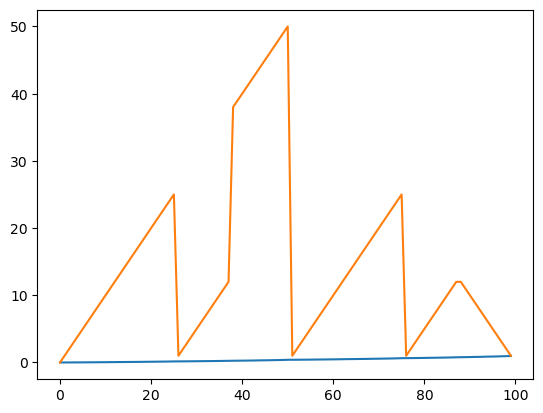

In [765]:
plt.plot(range(0, 100), values[:100])
plt.plot(range(0, 100), policy[:100])

In [512]:
print(policy)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0.]


In [514]:
print(values)

[0.         0.00206467 0.00516393 0.00922521 0.01291015 0.01738521
 0.02306354 0.02781403 0.03227537 0.03768437 0.04346334 0.05035416
 0.05765916 0.0652388  0.06953513 0.07443112 0.08068842 0.08661062
 0.0942125  0.10314328 0.10865867 0.11596637 0.12588597 0.13357982
 0.14414789 0.16       0.16309836 0.16774609 0.17383812 0.17936522
 0.18607801 0.19459549 0.20172108 0.20841305 0.2165275  0.2251952
 0.23553158 0.24648874 0.25785902 0.26430287 0.2716468  0.28103265
 0.2899165  0.30131895 0.31471541 0.32298808 0.3339499  0.34882925
 0.36036994 0.37622196 0.4        0.40309836 0.40774609 0.41383812
 0.41936522 0.42607801 0.43459549 0.44172108 0.44841305 0.4565275
 0.4651952  0.47553158 0.48648874 0.49785902 0.50430287 0.5116468
 0.52103265 0.5299165  0.54131895 0.55471541 0.56298808 0.5739499
 0.58882925 0.60036994 0.61622196 0.64       0.64464765 0.65161913
 0.6607573  0.66904783 0.67911712 0.69189324 0.70258172 0.71261959
 0.72479137 0.73779285 0.75329755 0.76973318 0.78678859 0.79645438

In [656]:
a = np.array([1,2,3,4,5])
b = [5, 6, 7]

In [658]:
np.where(b == np.max(a))[0]

array([0])